In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:/Users/dell/Desktop/Data_sets/forestfires.csv")

In [3]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [4]:
df.drop(["day"],axis=1,inplace=True)

# MULTIPLE REGRESSION

In [5]:
df.columns

Index(['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area'],
      dtype='object')

In [6]:
x1=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]

In [7]:
y1=df.iloc[:,-1]

In [8]:
import statsmodels.api as sm
model=sm.OLS(y1,x1).fit()
prediction=model.predict(x1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.021
Date:                Fri, 31 May 2019   Prob (F-statistic):           0.000640
Time:                        14:51:40   Log-Likelihood:                -2874.3
No. Observations:                 517   AIC:                             5771.
Df Residuals:                     506   BIC:                             5817.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.9523      1.447      1.350      0.178      -0.890       4.795
Y              0.2034      2.716      0.075      0.940      -5.133       5.539
month          2.6098      2.768      0.943      0.346      -2.828       8.048
FFMC          -0.1917      0.264     -0.725      0.469      -0.711       0.328
DMC            0.1014      0.068      1.490      0.137      -0.032       0.235
DC            -0.0291      0.032     -0.911      0.363      -0.092       0.034
ISI           -0.6679      0.704     -0.949      0.343      -2.050       0.715
temp           0.8708      0.760      1.146      0.252      -0.622       2.364
RH            -0.2190      0.207     -1.055      0.292      -0.627       0.189
wind           1.1903      1.674      0.711      0.478      -2.099       4.480
rain          -3.1766      9.615     -0.330      0.741     -22.066      15.713
==============================================================================
Omnibus:                      975.587   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           784003.603
Skew:                          12.584   Prob(JB):                         0.00
Kurtosis:                     192.107   Cond. No.                     2.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=1)

In [59]:
from sklearn import linear_model as lm
model=lm.LinearRegression()

In [60]:
result=model.fit(x_train,y_train)

In [61]:
accuracy=model.score(x_train,y_train)
print("accuracy of model:",accuracy)

accuracy of model: 0.014700814564854281


In [62]:
prediction=model.predict(x_train)
print('intercept:',model.intercept_)
print('slope',model.coef_)

intercept: -17.198555372254
slope [  1.53840206  -1.30496504   2.82107025   0.06473337   0.03767873
  -0.02382883  -0.84017859   0.96024557  -0.08483864   0.91895094
 -17.29683691]


In [63]:
from sklearn.metrics import mean_squared_error,r2_score


In [64]:
rmse=(np.sqrt(mean_squared_error(y_train,prediction)))
r2=r2_score(y_train,prediction)
print("the model performance for training set")
print("--------------------------------------")
print("accuracy of model:",accuracy)
print("rmse is {}".format(rmse))
print("rmse is {}".format(rmse))
print("r2 score is {}".format(r2))

the model performance for training set
--------------------------------------
accuracy of model: 0.014700814564854281
rmse is 63.400747183580705
rmse is 63.400747183580705
r2 score is 0.014700814564854281


# RANDOM FOREST REGRESSION

In [167]:
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [168]:
type(df)

pandas.core.frame.DataFrame

In [169]:
df.isnull().any()

X       False
Y       False
FFMC    False
DMC     False
DC      False
ISI     False
temp    False
RH      False
wind    False
rain    False
area    False
dtype: bool

In [170]:
type(df)

pandas.core.frame.DataFrame

In [171]:
df.drop(["month"],axis=1,inplace=True)

KeyError: "['month'] not found in axis"

In [172]:
df

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [174]:
df.dtypes

X         int64
Y         int64
FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
RH        int64
wind    float64
rain    float64
area    float64
dtype: object

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline


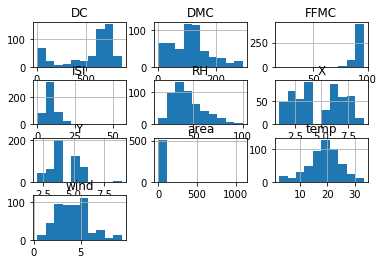

In [176]:
c=df[['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','area']]
c.hist()
plt.show()

X           AxesSubplot(0.125,0.71587;0.168478x0.16413)
Y        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
FFMC     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
DMC      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
DC         AxesSubplot(0.125,0.518913;0.168478x0.16413)
ISI     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
temp    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
RH      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
wind       AxesSubplot(0.125,0.321957;0.168478x0.16413)
rain    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
area    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

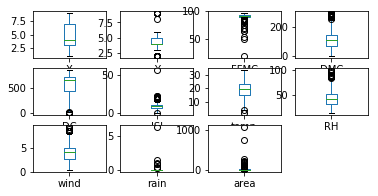

In [177]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

In [178]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

In [179]:
X

array([[ 7. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. , 94.4, ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 79.5, ..., 31. ,  4.5,  0. ]])

In [180]:
y

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [181]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 1)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [182]:
y_pred=regressor.predict([[7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0]])

In [183]:
y_pred

array([2.735])

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [186]:
X_train

array([[ 5. ,  6. , 94.3, ..., 24. ,  4. ,  0. ],
       [ 8. ,  6. , 95.2, ..., 45. ,  2.2,  0. ],
       [ 6. ,  5. , 90.3, ..., 78. ,  4. ,  0. ],
       ...,
       [ 4. ,  5. , 92.5, ..., 45. ,  3.1,  0. ],
       [ 4. ,  3. , 92.6, ..., 50. ,  2.7,  0. ],
       [ 5. ,  4. , 91. , ..., 71. ,  7.6,  1.4]])

In [187]:
X_test

array([[ 3. ,  4. , 93.3, ..., 49. ,  3.6,  0. ],
       [ 6. ,  3. , 90.6, ..., 31. ,  8.5,  0. ],
       [ 5. ,  4. , 91.8, ..., 39. ,  5.4,  0. ],
       ...,
       [ 2. ,  4. , 91.6, ..., 59. ,  2.7,  0. ],
       [ 1. ,  3. , 92.1, ..., 40. ,  4. ,  0. ],
       [ 4. ,  5. , 92. , ..., 75. ,  0.9,  0. ]])

In [188]:
y_train

array([0.00000e+00, 2.55000e+00, 1.83000e+01, 1.21000e+01, 2.35000e+00,
       6.30000e+00, 3.01800e+01, 2.75000e+00, 2.42300e+01, 0.00000e+00,
       0.00000e+00, 8.31000e+00, 6.41000e+01, 0.00000e+00, 1.45700e+01,
       7.60000e-01, 3.94000e+00, 3.71000e+00, 2.18000e+00, 2.13000e+00,
       0.00000e+00, 8.84900e+01, 2.69000e+00, 0.00000e+00, 0.00000e+00,
       1.56000e+00, 6.10000e+00, 4.40000e+00, 8.98000e+00, 0.00000e+00,
       2.93000e+00, 0.00000e+00, 2.47000e+00, 2.77000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.46000e+00, 4.33200e+01, 3.20700e+01,
       9.77000e+00, 0.00000e+00, 3.18600e+01, 9.50000e-01, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 6.58000e+00, 1.10600e+01, 2.29000e+00,
       5.97000e+00, 0.00000e+00, 9.96000e+00, 0.00000e+00, 0.00000e+00,
       4.67000e+01, 0.00000e+00, 1.54500e+01, 5.50000e-01, 3.32000e+00,
       4.62000e+00, 1.08200e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.13200e+01, 3.71000e+00, 0.00000e+00, 0.000

In [189]:
y_test

array([3.5880e+01, 1.9400e+00, 9.0000e-02, 2.4770e+01, 1.0730e+01,
       4.6100e+00, 0.0000e+00, 8.5900e+00, 0.0000e+00, 0.0000e+00,
       9.2700e+00, 2.0000e+00, 0.0000e+00, 2.0300e+00, 1.6400e+00,
       0.0000e+00, 1.0080e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.5488e+02, 0.0000e+00, 6.3800e+00, 2.4240e+01, 0.0000e+00,
       2.8660e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9600e+00,
       5.8600e+00, 0.0000e+00, 1.7463e+02, 3.6400e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1240e+01, 0.0000e+00,
       0.0000e+00, 1.6100e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.9500e+00,
       2.1800e+00, 0.0000e+00, 0.0000e+00, 1.0339e+02, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 6.0400e+00, 6.6100e+00, 0.0000e+00,
       2.0100e+00, 2.5300e+00, 0.0000e+00, 2.2030e+01, 2.0030e+01,
       2.1400e+00, 1.4680e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 7.4800e+00, 0.0000e+00, 0.0000e

In [190]:
X_train.shape

(413, 10)

In [191]:
y_pred1=regressor.predict(X_train)

In [192]:
y_pred=regressor.predict(X_test)

In [193]:
y_pred

array([2.15280000e+01, 4.79400000e+00, 5.00300000e+00, 2.34086000e+01,
       1.21596000e+01, 8.52033333e+00, 2.64000000e-01, 5.34900000e+00,
       3.45800000e+00, 3.86500000e+00, 7.24100000e+00, 2.94500000e+00,
       8.98000000e-01, 9.95450000e+00, 2.04000000e+00, 1.63300000e+00,
       7.05400000e+00, 4.21100000e+00, 7.04900000e+00, 1.13500000e+00,
       2.17500000e+02, 0.00000000e+00, 5.67600000e+00, 1.98540000e+01,
       8.12000000e-01, 2.57940000e+01, 0.00000000e+00, 1.34400000e+00,
       6.76000000e-01, 4.46400000e+00, 9.54340000e+01, 1.03400000e+00,
       1.27096000e+02, 9.26900000e+00, 1.76100000e+00, 4.33100000e+00,
       1.64000000e-01, 4.08383333e+00, 1.62520000e+01, 2.47100000e+00,
       5.89440000e+01, 1.11200000e+00, 8.47000000e-01, 1.26400000e+00,
       4.17300000e+00, 5.50500000e+00, 0.00000000e+00, 4.10000000e-02,
       1.76980000e+01, 3.10130000e+01, 2.88900000e+00, 4.27450000e+01,
       2.52500000e+00, 7.23730000e+01, 6.36700000e+00, 4.60800000e+00,
      

In [194]:
from sklearn.metrics import r2_score

In [195]:
r2_score(y_test,y_pred)

0.8457622181225709

In [196]:
accuraccy=regressor.score(X_test,y_test)

In [197]:
accuraccy

0.8457622181225709

In [198]:
accuraccy=regressor.score(X_train,y_train)

In [199]:
accuraccy

0.7531825686942275

In [200]:
r2_score(y_train,y_pred1)

0.7531825686942275

In [201]:
from sklearn.metrics import mean_squared_error

In [202]:
rmse=(np.sqrt(mean_squared_error(y_train,y_pred1)))

In [203]:
rmse

33.790309921393